In [1]:
from __future__ import print_function

import argparse
import csv
import os
import sys
import tifffile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import glob
import pickle
from pathlib import Path
from PIL import Image
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as offline
offline.init_notebook_mode(connected = True)

In [2]:
CNN_output_dir = Path('./checkpoints/CBNA/CNN/')
MLP_output_dir = Path('./checkpoints/CBNA/MLP/')

df_CNN = pd.read_csv(CNN_output_dir.joinpath('CNN_tss_per_cls.csv'), sep=',', low_memory=False)
df_MLP = pd.read_csv(MLP_output_dir.joinpath('MLP_tss_per_cls.csv'), sep=',', low_memory=False)

In [3]:
df_MLP.head()

,species,train_cnt,test_cnt,recall,specificity,tss
0,"Geranium argenteum L., 1756",29,4,1.000000,0.978343,0.978343
1,Cherleria laricifolia subsp. laricifolia (L.) ...,779,133,0.962406,0.862561,0.824967
2,Cherleria capillacea (All.) A.J.Moore & Dillen...,115,19,0.894737,0.930268,0.825004
3,Facchinia rupestris (Scop.) Dillenb. & Kaderei...,225,32,0.875000,0.906070,0.781070
4,"Geranium columbinum L., 1753",1199,184,0.885870,0.643201,0.529070


In [4]:
portion = 10
a = np.arange(0, 100, portion) + portion
c = a.tolist()
breaks = np.asarray(np.percentile(df_CNN.train_cnt, c))
df_CNN['global_cnt'] = (df_CNN.train_cnt.values > breaks[..., np.newaxis]).sum(0)
df_MLP['global_cnt'] = (df_MLP.train_cnt.values > breaks[..., np.newaxis]).sum(0)

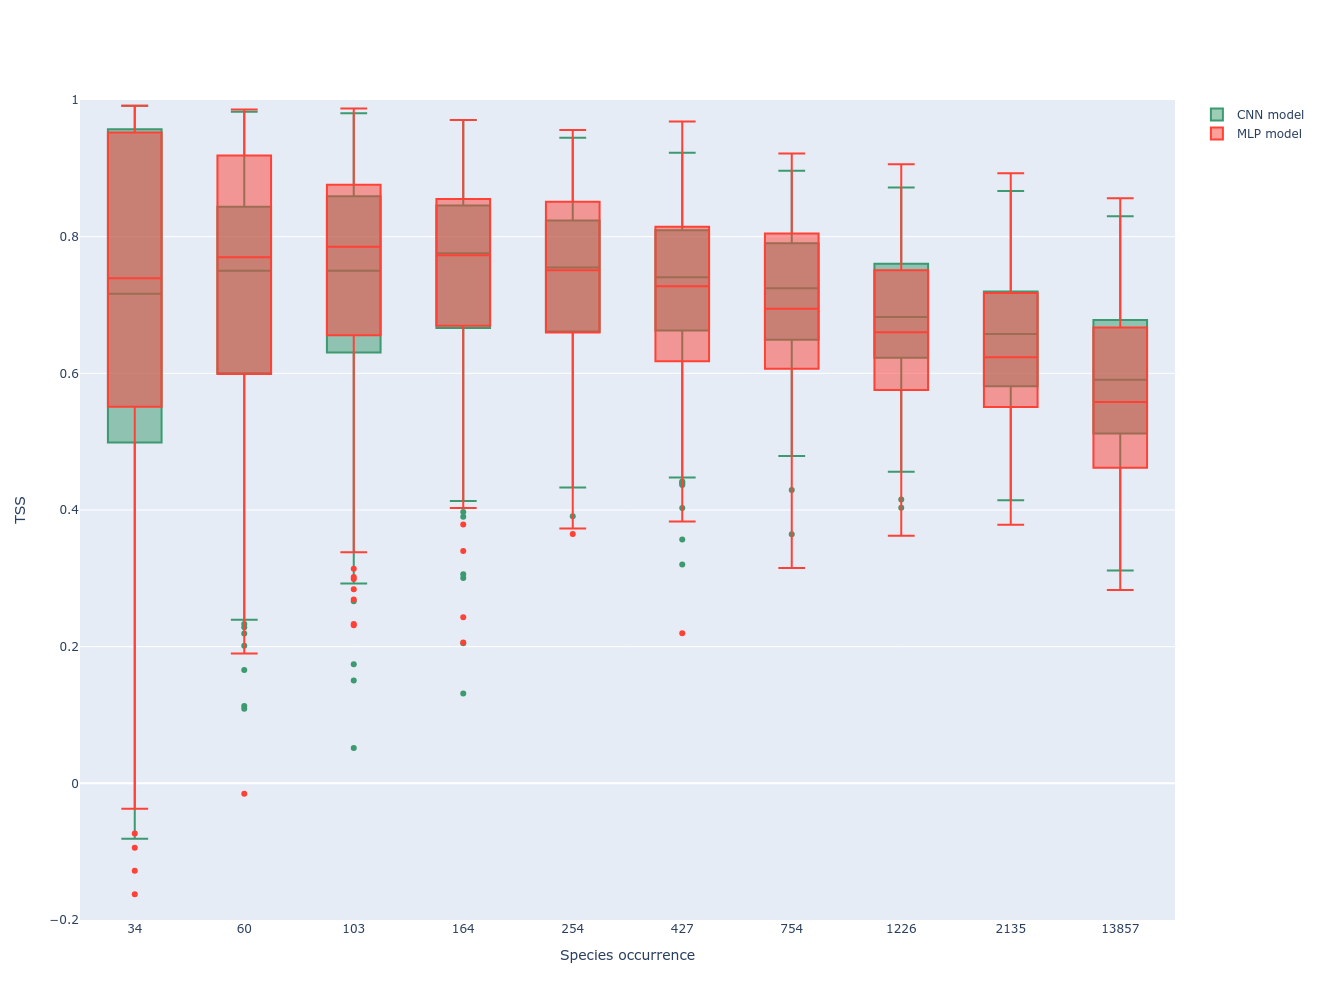

In [5]:
x = df_CNN['global_cnt'].values

trace0 = go.Box(
    y=df_CNN['tss'].values,
    x=x,
    name='CNN model',
    marker=dict(
        color='#3D9970'
    )
)
trace1 = go.Box(
    y=df_MLP['tss'].values,
    x=x,
    name='MLP model',
    marker=dict(
        color='#FF4136'
    )
)

layout = go.Layout(
    autosize=False,
    width=1200,
    height=1000,
    yaxis=go.layout.YAxis(
        title='TSS',
        range=[-0.2, 1],
        zeroline=True
    ),
)

data = [trace0, trace1]
fig = go.Figure(data=data, layout=layout)
fig.update_xaxes(
                tickmode = 'array',
                tickvals = np.arange(0,len(c)).astype(int),
                ticktext= [int(val) for val in breaks])
fig.update_layout(xaxis_title="Species occurrence")
fig.show()

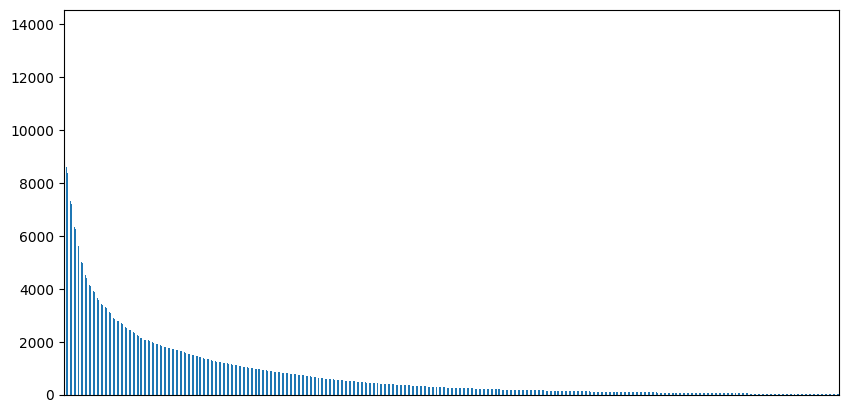

In [6]:
df_CNN['train_cnt'].sort_values(ascending=False).plot(figsize=(10,5), kind='bar', rot=0)
plt.xticks([])
plt.show()

In [7]:
Fusion_output_dir = Path('./checkpoints/CBNA/Fusion/')
df_Fusion = pd.read_csv(Fusion_output_dir.joinpath('Fusion_tss_per_cls.csv'), sep=',', low_memory=False)
df_Fusion['global_cnt'] = (df_Fusion.train_cnt.values > breaks[..., np.newaxis]).sum(0)

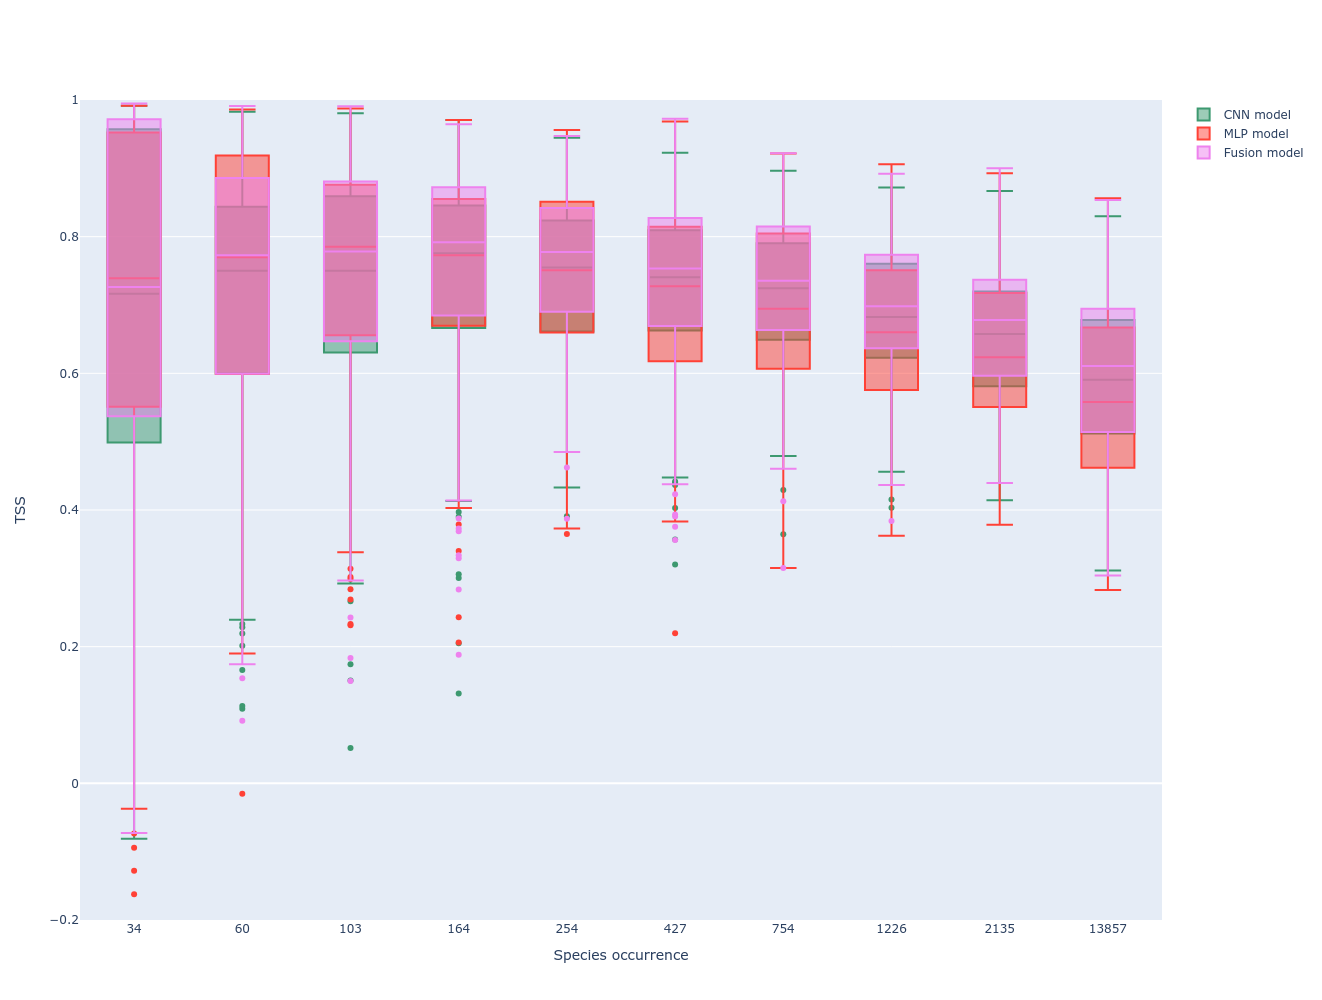

In [8]:
x = df_CNN['global_cnt'].values

trace0 = go.Box(
    y=df_CNN['tss'].values,
    x=x,
    name='CNN model',
    marker=dict(
        color='#3D9970'
    )
)
trace1 = go.Box(
    y=df_MLP['tss'].values,
    x=x,
    name='MLP model',
    marker=dict(
        color='#FF4136'
    )
)
trace2 = go.Box(
    y=df_Fusion['tss'].values,
    x=x,
    name='Fusion model',
    marker=dict(
        color='violet'
    )
)

layout = go.Layout(
    autosize=False,
    width=1200,
    height=1000,
    yaxis=go.layout.YAxis(
        title='TSS',
        range=[-0.2, 1],
        zeroline=True
    ),
)

data = [trace0, trace1, trace2]
fig = go.Figure(data=data, layout=layout)
fig.update_xaxes(
                tickmode = 'array',
                tickvals = np.arange(0,len(c)).astype(int),
                ticktext= [int(val) for val in breaks])
fig.update_layout(xaxis_title="Species occurrence")
fig.show()